<a href="https://colab.research.google.com/github/RicottaChz/Pytorch_Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer1(number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
      super().__init__() # instantiate our nn.Module
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)

      return x

In [22]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [9]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
# Change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [12]:
# Convert these to numpy array
X = X.values
y = y.values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [17]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [18]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [25]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
# Train our model!
# Epochs? (our run thru all the training data in our network)
epochs = 300
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.9593889713287354
Epoch: 10 and loss: 0.9310257434844971
Epoch: 20 and loss: 0.898703932762146
Epoch: 30 and loss: 0.8625795841217041
Epoch: 40 and loss: 0.8231237530708313
Epoch: 50 and loss: 0.7819623351097107
Epoch: 60 and loss: 0.7424018383026123
Epoch: 70 and loss: 0.7054346203804016
Epoch: 80 and loss: 0.6709553599357605
Epoch: 90 and loss: 0.6387065052986145
Epoch: 100 and loss: 0.6083163022994995
Epoch: 110 and loss: 0.5795047879219055
Epoch: 120 and loss: 0.5519545078277588
Epoch: 130 and loss: 0.5248970985412598
Epoch: 140 and loss: 0.4977360665798187
Epoch: 150 and loss: 0.4708419144153595
Epoch: 160 and loss: 0.44537776708602905
Epoch: 170 and loss: 0.4227592647075653
Epoch: 180 and loss: 0.4014855623245239
Epoch: 190 and loss: 0.38155364990234375
Epoch: 200 and loss: 0.3629516363143921
Epoch: 210 and loss: 0.3455160856246948
Epoch: 220 and loss: 0.32916730642318726
Epoch: 230 and loss: 0.31376633048057556
Epoch: 240 and loss: 0.2992028594017029
Epoch: 2

Text(0.5, 0, 'epochs')

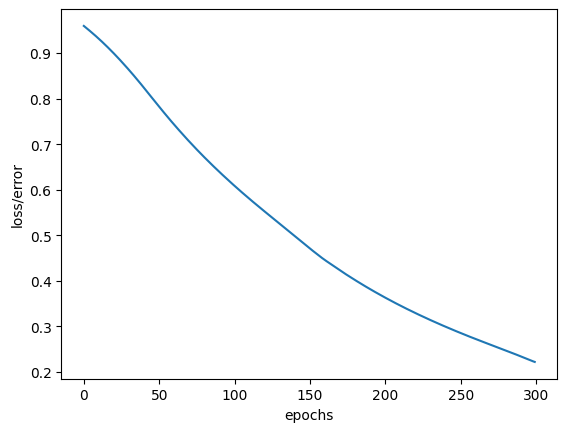

In [29]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epochs')

In [30]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [31]:
loss

tensor(0.2790)

In [35]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1.) tensor([-1.9589,  2.2358,  3.0335]) 	 2 	 2
2.) tensor([-2.5664,  2.3143,  4.2529]) 	 2 	 2
3.) tensor([-3.0170,  2.7040,  4.7277]) 	 2 	 2
4.) tensor([-1.4140,  2.3917,  1.6596]) 	 1 	 1
5.) tensor([-2.4890,  2.4917,  3.8549]) 	 2 	 2
6.) tensor([-0.9648,  2.2554,  1.0238]) 	 1 	 1
7.) tensor([-2.0230,  2.4061,  2.9476]) 	 2 	 2
8.) tensor([-1.3881,  2.4059,  1.5842]) 	 1 	 1
9.) tensor([-2.2399,  2.4405,  3.3788]) 	 2 	 2
10.) tensor([-2.7667,  2.4271,  4.5476]) 	 2 	 2
11.) tensor([-1.8940,  2.3478,  2.7506]) 	 2 	 2
12.) tensor([ 2.6699, -0.9321, -1.2455]) 	 0 	 0
13.) tensor([ 2.4976, -0.7910, -1.2099]) 	 0 	 0
14.) tensor([-0.3914,  1.7324,  0.5294]) 	 1 	 1
15.) tensor([ 2.1186, -0.4513, -0.9107]) 	 0 	 0
16.) tensor([-1.8144,  2.3542,  2.5799]) 	 2 	 2
17.) tensor([ 2.4225, -0.7266, -1.1633]) 	 0 	 0
18.) tensor([-1.9080,  2.2443,  2.9211]) 	 1 	 2
19.) tensor([ 2.5973, -0.8730, -1.2344]) 	 0 	 0
20.) tensor([ 2.0929, -0.4388, -0.9594]) 	 0 	 0
21.) tensor([-0.6238,  1.9427

In [42]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [43]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 2.6331, -0.9026, -1.2443])


In [44]:
# Save our NN Model
torch.save(model.state_dict(), 'iris.pt')

In [45]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('iris.pt'))

<All keys matched successfully>

In [46]:
# Make sure it load correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)